In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

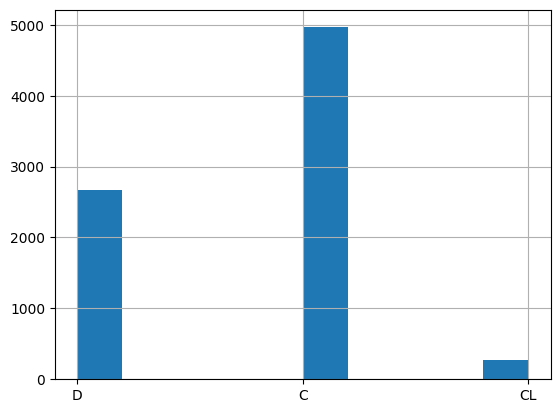

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

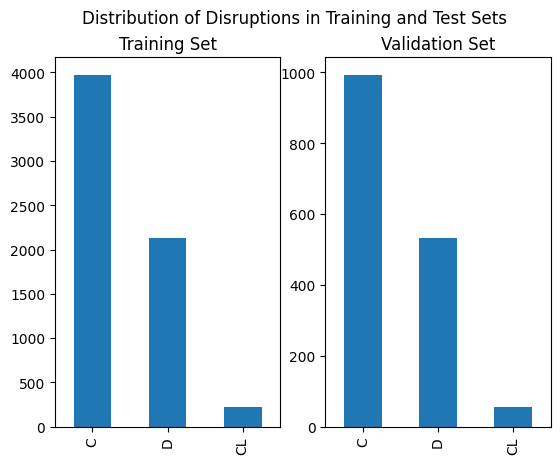

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

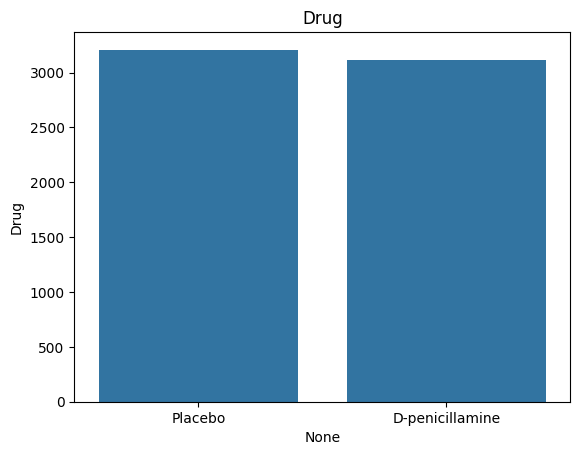

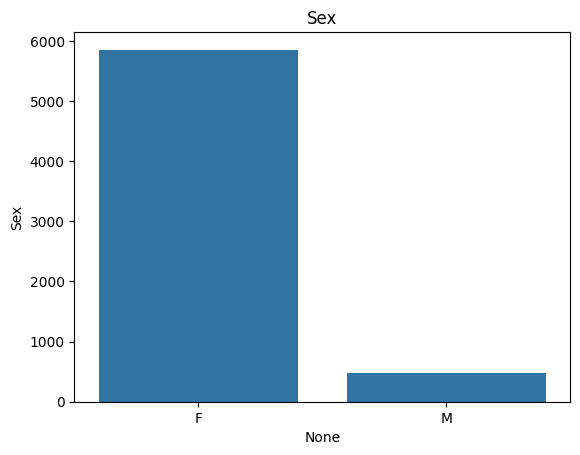

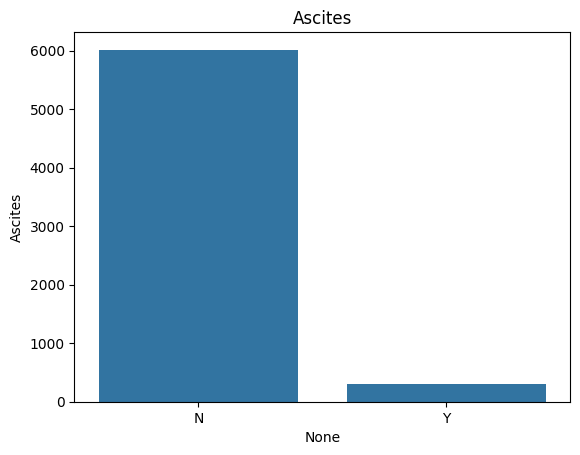

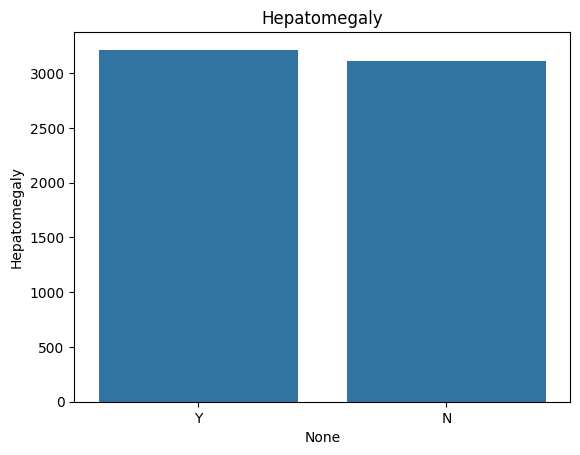

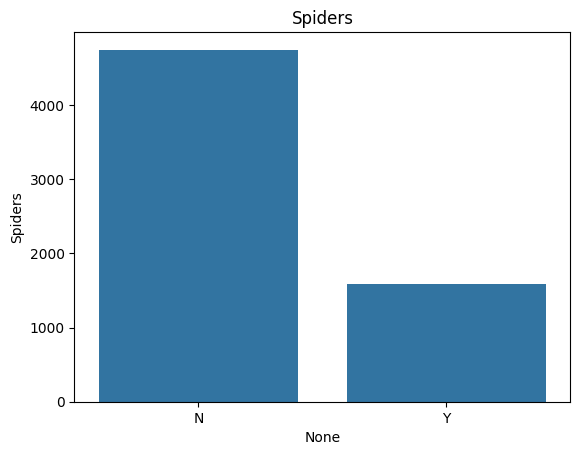

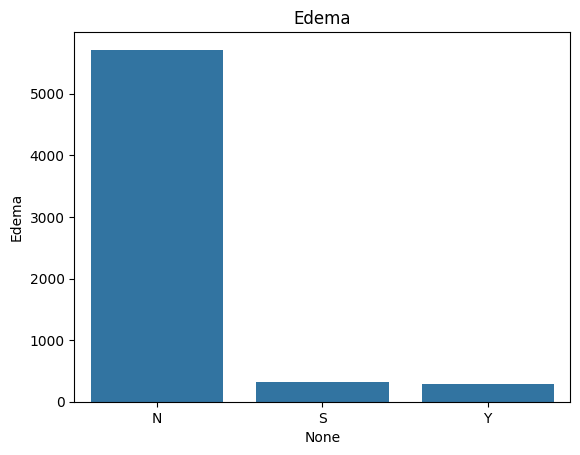

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
4703,4703,2769,0,14060,0,0,0,0,N,1.1,316.0,3.69,82.0,714.0,237.15,90.0,316.0,9.9,3.0,C,1,0,0,1,0,0
6394,6394,3282,0,17703,0,0,1,1,N,2.3,472.0,3.60,52.0,3896.0,198.40,85.0,335.0,10.4,3.0,CL,1,0,0,0,1,0
6806,6806,2689,0,19002,0,0,1,0,N,0.9,201.0,3.70,39.0,3228.0,166.40,166.0,224.0,10.9,3.0,D,1,0,0,0,0,1
6340,6340,3445,0,16418,0,0,1,0,S,3.4,263.0,3.36,76.0,2115.0,163.00,93.0,344.0,12.1,4.0,D,0,1,0,0,0,1
5496,5496,2106,0,16109,0,0,0,0,N,0.9,259.0,4.03,10.0,1174.0,71.30,84.0,312.0,10.6,2.0,C,1,0,0,1,0,0


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
4703,4703,2769,0,14060,0,0,0,0,1.1,316.0,3.69,82.0,714.0,237.15,90.0,316.0,9.9,3.0,1,0,0,1,0,0
6394,6394,3282,0,17703,0,0,1,1,2.3,472.0,3.60,52.0,3896.0,198.40,85.0,335.0,10.4,3.0,1,0,0,0,1,0
6806,6806,2689,0,19002,0,0,1,0,0.9,201.0,3.70,39.0,3228.0,166.40,166.0,224.0,10.9,3.0,1,0,0,0,0,1
6340,6340,3445,0,16418,0,0,1,0,3.4,263.0,3.36,76.0,2115.0,163.00,93.0,344.0,12.1,4.0,0,1,0,0,0,1
5496,5496,2106,0,16109,0,0,0,0,0.9,259.0,4.03,10.0,1174.0,71.30,84.0,312.0,10.6,2.0,1,0,0,1,0,0


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.018401,0.012964,-0.006268,-0.007949,0.008676,0.004544,0.011057,0.011765,-0.014738,-0.024950,0.021731,-0.004479,0.023934,-0.011909,-0.005766,0.011914,-0.018251,0.005081,-0.005533,-0.001342,-0.006195,0.009673,0.002584
N_Days,-0.018401,1.000000,0.002158,-0.097136,-0.060228,-0.254851,-0.291482,-0.216721,-0.343923,-0.143228,0.259598,-0.287348,-0.022761,-0.246123,-0.178804,0.156788,-0.161366,-0.227033,0.245648,-0.101563,-0.241481,0.345649,-0.073737,-0.324807
Drug,0.012964,0.002158,1.000000,0.087752,0.047549,0.045858,-0.060496,0.001273,-0.044588,0.001355,-0.024470,-0.004816,0.003951,-0.043137,-0.057148,-0.023939,-0.042873,-0.035714,-0.029499,0.009906,0.031436,-0.017983,0.020083,0.010601
Age,-0.006268,-0.097136,0.087752,1.000000,0.114650,0.155459,0.108939,0.055133,0.097601,-0.066389,-0.110930,0.101971,0.021014,-0.020446,0.017644,-0.092556,0.143197,0.125404,-0.140547,0.083949,0.110661,-0.136600,-0.117837,0.185336
Sex,-0.007949,-0.060228,0.047549,0.114650,1.000000,0.027486,0.068835,-0.024914,0.027999,0.022728,-0.024004,0.162805,0.005381,0.063330,0.064696,-0.051270,0.074862,0.044399,-0.058030,0.075604,0.002113,-0.127550,0.008472,0.127123
Ascites,0.008676,-0.254851,0.045858,0.155459,0.027486,1.000000,0.191176,0.209010,0.372482,-0.052939,-0.337595,0.286636,0.050353,0.126536,0.130380,-0.185345,0.294471,0.176781,-0.526176,0.089787,0.653229,-0.261706,-0.023119,0.276528
Hepatomegaly,0.004544,-0.291482,-0.060496,0.108939,0.068835,0.191176,1.000000,0.332616,0.308108,0.147431,-0.276481,0.280124,0.127287,0.207896,0.162661,-0.188590,0.260431,0.499475,-0.231509,0.138783,0.181746,-0.399878,0.041816,0.392624
Spiders,0.011057,-0.216721,0.001273,0.055133,-0.024914,0.209010,0.332616,1.000000,0.257979,0.037644,-0.234978,0.261163,0.067838,0.143553,0.075821,-0.172292,0.265551,0.285730,-0.266746,0.140286,0.230291,-0.320711,0.029969,0.316277
Bilirubin,0.011765,-0.343923,-0.044588,0.097601,0.027999,0.372482,0.308108,0.257979,1.000000,0.303440,-0.305465,0.454594,0.128048,0.373175,0.317273,-0.082429,0.290931,0.203218,-0.316909,0.138150,0.303950,-0.423974,0.019996,0.425719
Cholesterol,-0.014738,-0.143228,0.001355,-0.066389,0.022728,-0.052939,0.147431,0.037644,0.303440,1.000000,-0.088334,0.177668,0.130371,0.324046,0.271481,0.097775,0.010431,0.045211,0.032827,0.001111,-0.047897,-0.188774,0.064655,0.167940


<Axes: >

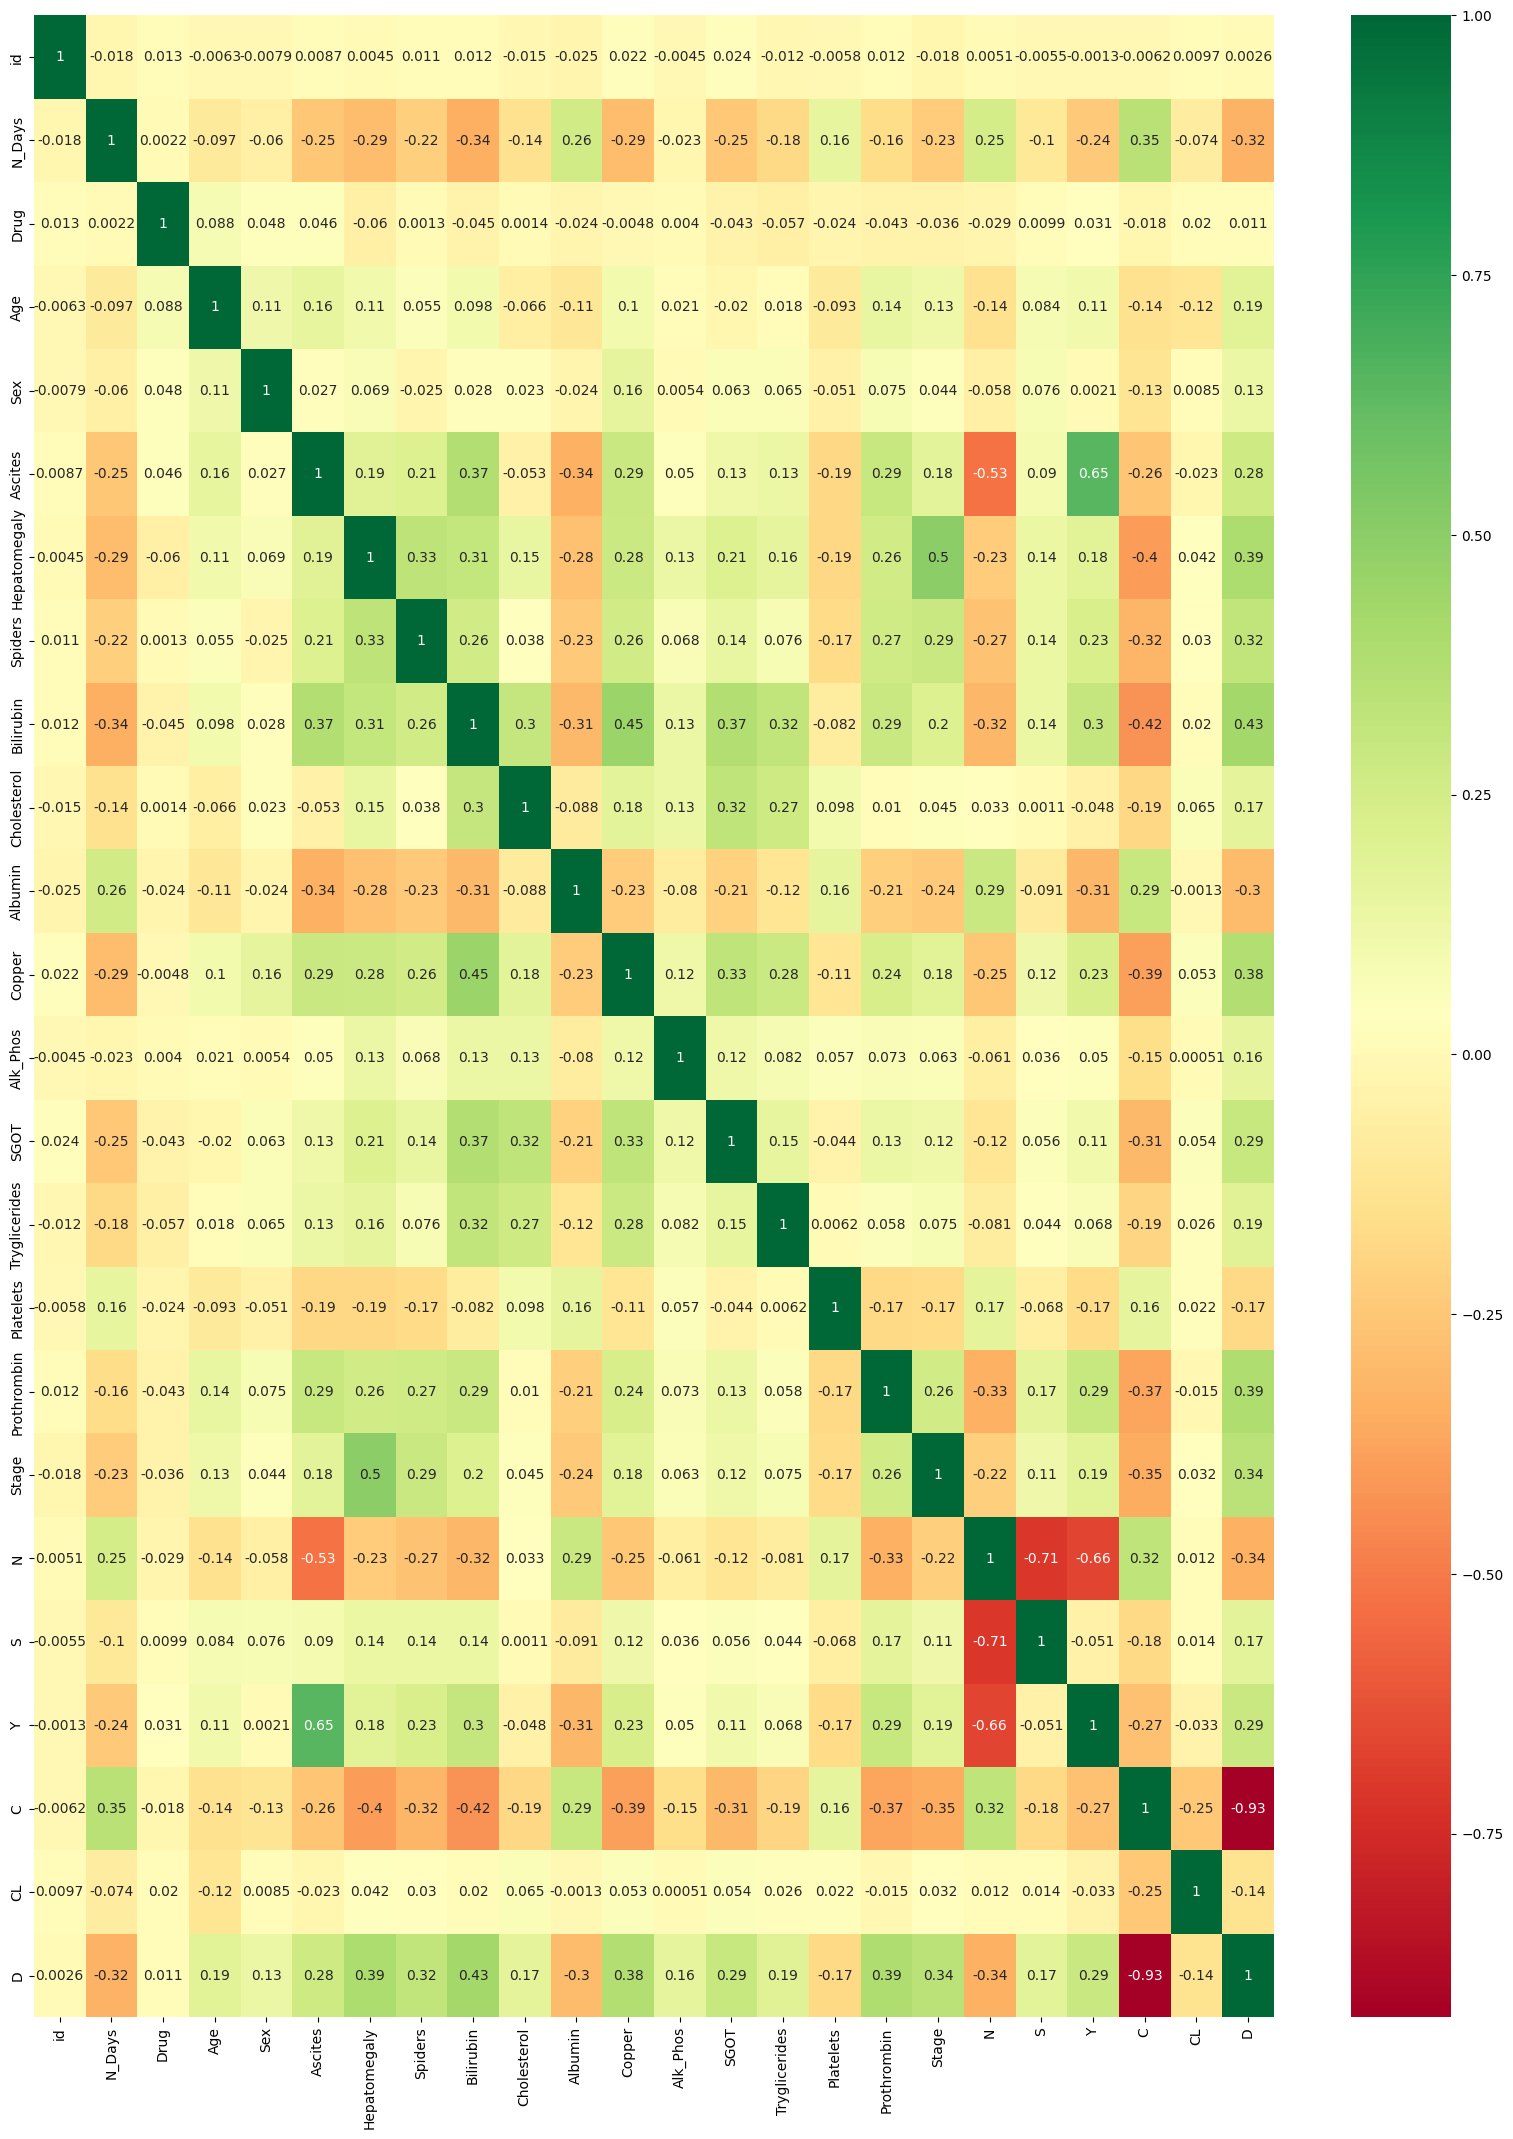

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

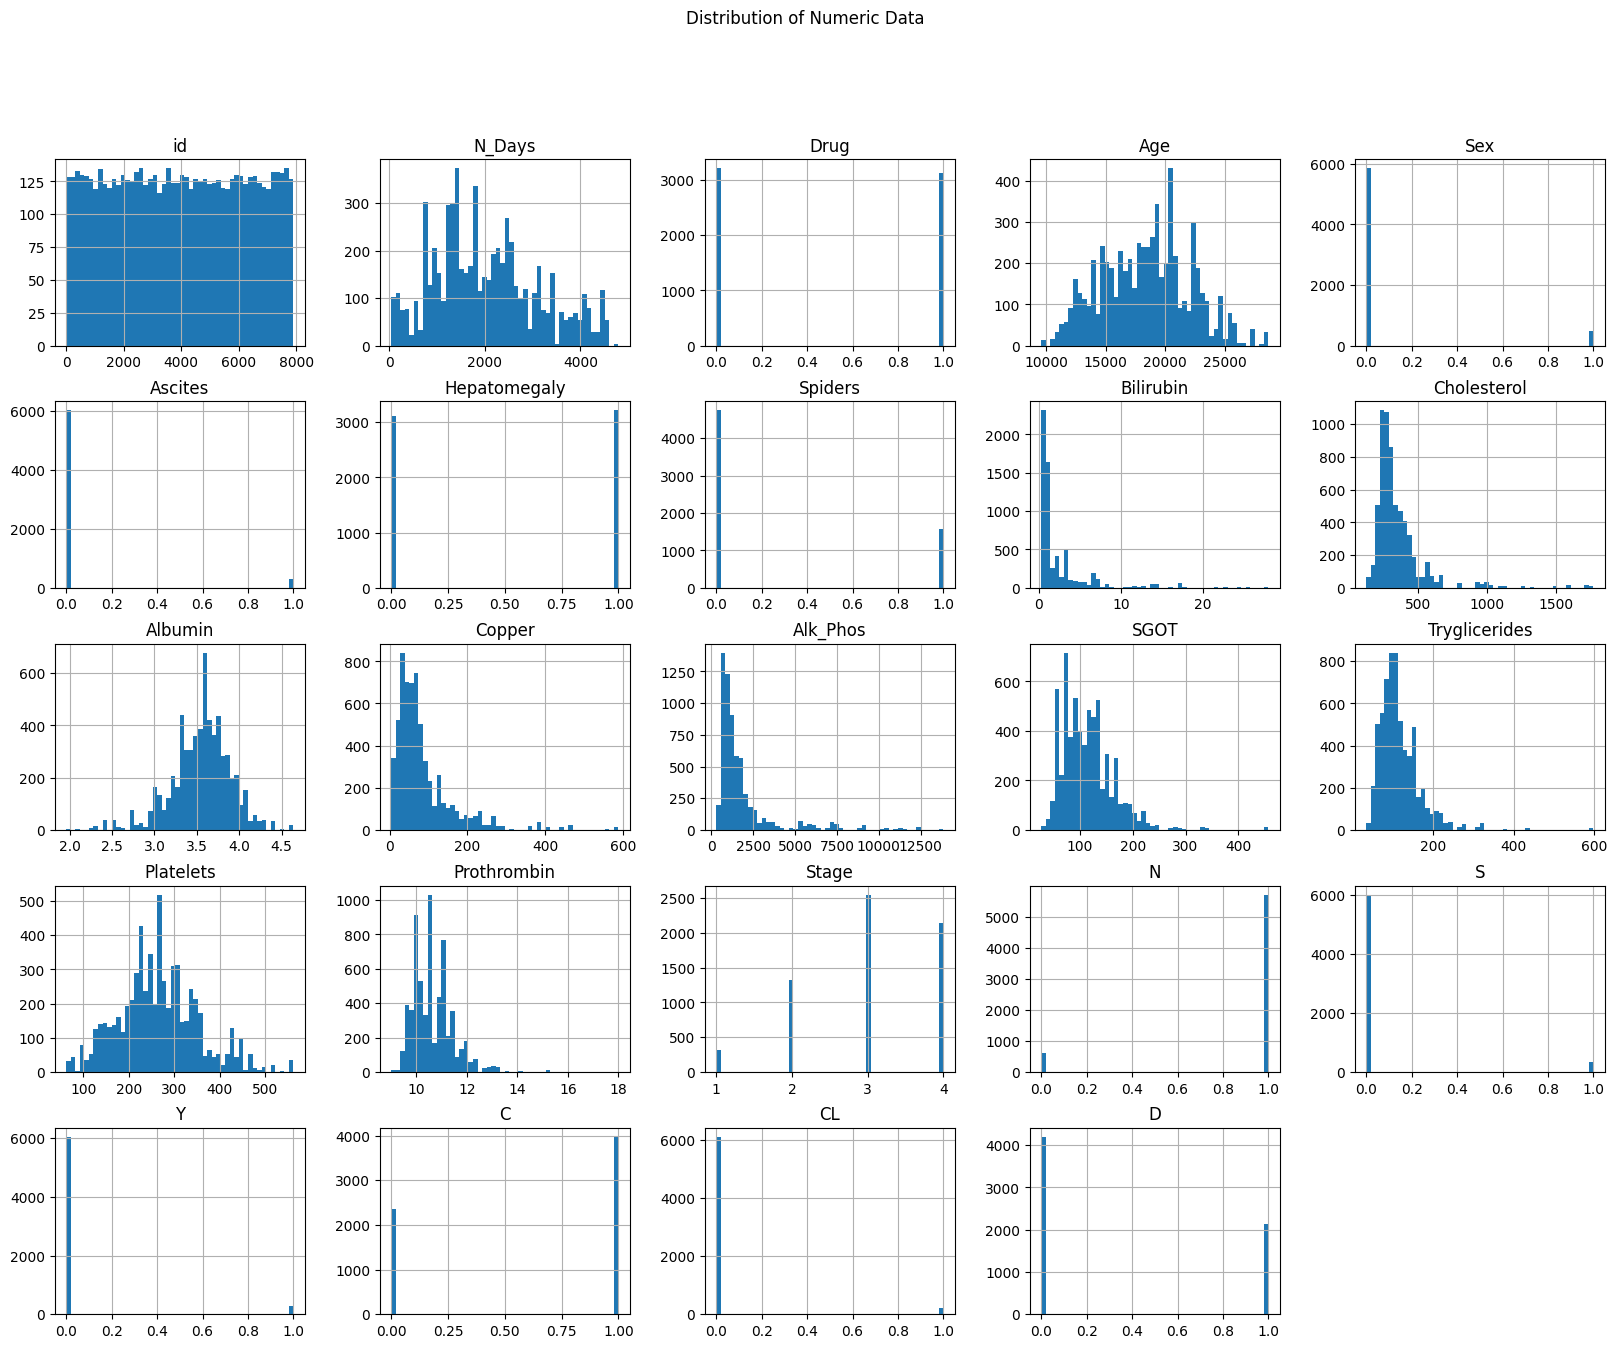

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

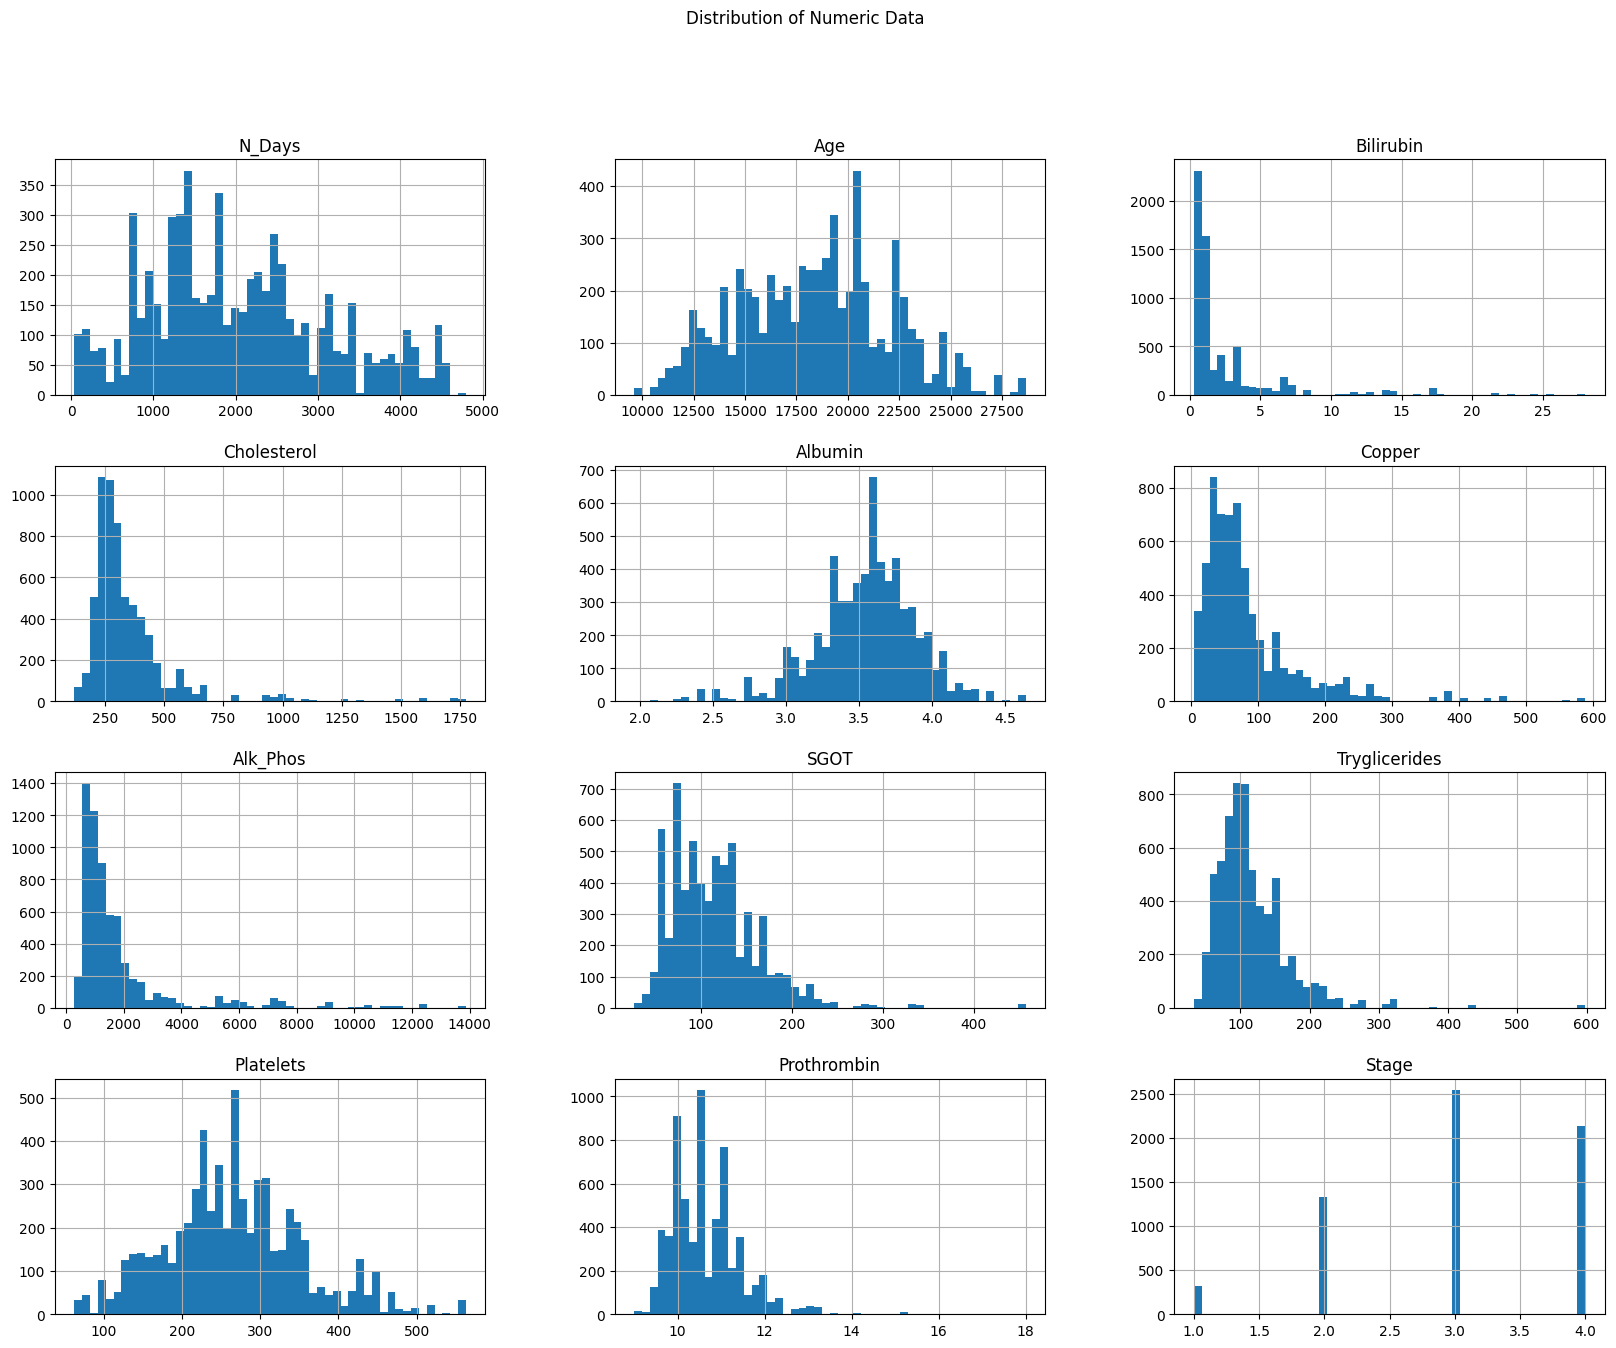

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

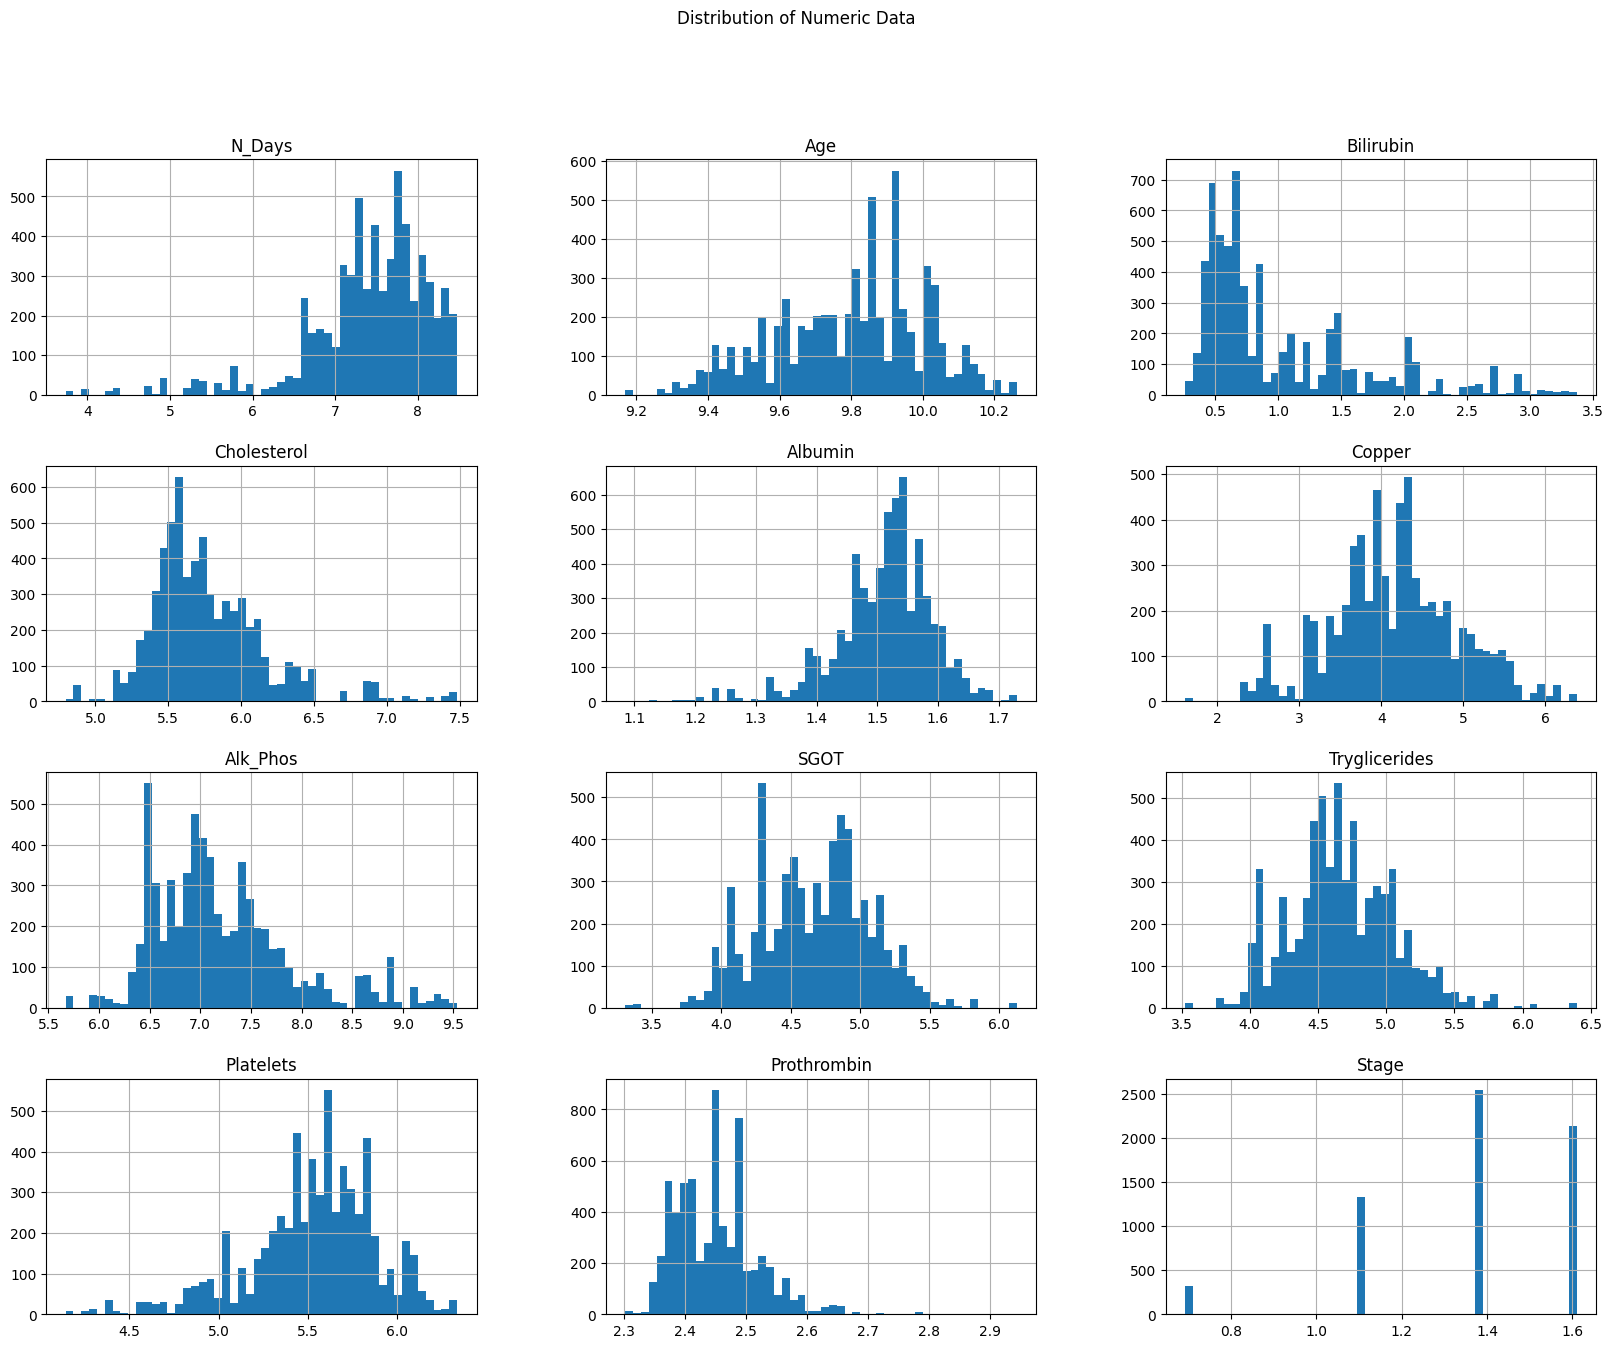

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

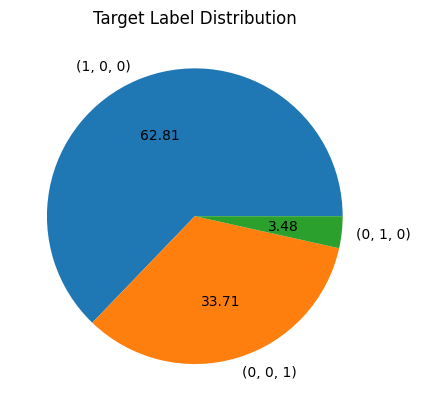

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 4703 to 2773
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [46]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [47]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [48]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 4703 to 2773
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6258 non-null   float64
 1   N_Days         6274 non-null   float64
 2   Drug           6269 non-null   float64
 3   Age            6282 non-null   float64
 4   Sex            6276 non-null   float64
 5   Ascites        6270 non-null   float64
 6   Hepatomegaly   6278 non-null   float64
 7   Spiders        6272 non-null   float64
 8   Bilirubin      6267 non-null   float64
 9   Cholesterol    6269 non-null   float64
 10  Albumin        6281 non-null   float64
 11  Copper         6276 non-null   float64
 12  Alk_Phos       6266 non-null   float64
 13  SGOT           6269 non-null   float64
 14  Tryglicerides  6267 non-null   float64
 15  Platelets      6273 non-null   float64
 16  Prothrombin    6267 non-null   float64
 17  Stage          6273 non-null   float64
 18  N    

In [49]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

id               66
N_Days           50
Drug             55
Age              42
Sex              48
Ascites          54
Hepatomegaly     46
Spiders          52
Bilirubin        57
Cholesterol      55
Albumin          43
Copper           48
Alk_Phos         58
SGOT             55
Tryglicerides    57
Platelets        51
Prothrombin      57
Stage            51
N                57
S                49
Y                50
C                62
CL               48
D                53
dtype: int64

## KNN imputation

In [50]:
from sklearn.impute import KNNImputer

In [51]:
train_copy.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
4703,4703.0,7.926603,0.0,9.551160,0.0,0.0,0.0,0.0,0.741937,5.758902,1.545433,4.418841,6.572283,5.472901,4.510860,5.758902,2.388763,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
6394,6394.0,8.096513,0.0,9.781546,0.0,0.0,1.0,1.0,1.193922,6.159095,1.526056,3.970292,8.267962,5.295313,4.454347,5.817111,2.433613,1.386294,1.0,0.0,0.0,0.0,1.0,0.0
6806,6806.0,7.897296,0.0,9.852352,0.0,0.0,1.0,0.0,0.641854,5.308268,1.547563,3.688879,8.079928,5.120386,5.117994,5.416100,2.476538,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
6340,6340.0,8.144969,0.0,9.706194,0.0,0.0,1.0,0.0,1.481605,5.575949,1.472472,4.343805,7.657283,5.099866,4.543295,5.843544,2.572612,1.609438,0.0,1.0,0.0,0.0,0.0,1.0
5496,5496.0,7.653020,0.0,9.687195,0.0,0.0,0.0,0.0,0.641854,5.560682,1.615420,2.397895,7.069023,4.280824,4.442651,5.746203,2.451005,1.098612,1.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15)

In [53]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

In [54]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [55]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [56]:
KNN_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,4703.0,7.926603,0.0,9.551160,0.0,0.0,0.0,0.0,0.741937,5.758902,1.545433,4.418841,6.572283,5.472901,4.510860,5.758902,2.388763,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,6394.0,8.096513,0.0,9.781546,0.0,0.0,1.0,1.0,1.193922,6.159095,1.526056,3.970292,8.267962,5.295313,4.454347,5.817111,2.433613,1.386294,1.0,0.0,0.0,0.0,1.0,0.0
2,6806.0,7.897296,0.0,9.852352,0.0,0.0,1.0,0.0,0.641854,5.308268,1.547563,3.688879,8.079928,5.120386,5.117994,5.416100,2.476538,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
3,6340.0,8.144969,0.0,9.706194,0.0,0.0,1.0,0.0,1.481605,5.575949,1.472472,4.343805,7.657283,5.099866,4.543295,5.843544,2.572612,1.609438,0.0,1.0,0.0,0.0,0.0,1.0
4,5496.0,7.653020,0.0,9.687195,0.0,0.0,0.0,0.0,0.641854,5.560682,1.615420,2.397895,7.069023,4.280824,4.442651,5.746203,2.451005,1.098612,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train.values, KNN_imputed_df.values)
print(f"Mean Squared Error for KNN imputation is : {mse}")

Mean Squared Error for KNN imputation is : 2304.3441861054944


## Median Imputation

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [60]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer.fit_transform(train_copy)

In [61]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)

In [62]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [63]:
Median_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,4703.0,7.926603,0.0,9.551160,0.0,0.0,0.0,0.0,0.741937,5.758902,1.545433,4.418841,6.572283,5.472901,4.510860,5.758902,2.388763,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,6394.0,8.096513,0.0,9.781546,0.0,0.0,1.0,1.0,1.193922,6.159095,1.526056,3.970292,8.267962,5.295313,4.454347,5.817111,2.433613,1.386294,1.0,0.0,0.0,0.0,1.0,0.0
2,6806.0,7.897296,0.0,9.852352,0.0,0.0,1.0,0.0,0.641854,5.308268,1.547563,3.688879,8.079928,5.120386,5.117994,5.416100,2.476538,1.386294,1.0,0.0,0.0,0.0,0.0,1.0
3,6340.0,8.144969,0.0,9.706194,0.0,0.0,1.0,0.0,1.481605,5.575949,1.472472,4.343805,7.657283,5.099866,4.543295,5.843544,2.572612,1.609438,0.0,1.0,0.0,0.0,0.0,1.0
4,5496.0,7.653020,0.0,9.687195,0.0,0.0,0.0,0.0,0.641854,5.560682,1.615420,2.397895,7.069023,4.280824,4.442651,5.746203,2.451005,1.098612,1.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# measuring the MSE between the original and imputed dataframes
mse = mean_squared_error(train.values, Median_imputed_df.values)
print(f"Mean Squared Error for Median Imputation is : {mse}")

Mean Squared Error for Median Imputation is : 2168.8316493271354
